### Elevation Profile Plot from a GPS Track

In [ ]:
import pandas as pd
import geopandas as gpd
import os

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
data_pkg_path = 'data'
gpx_path = os.path.join(data_pkg_path, 'gps', 'summit.gpx')
# GPX files contain many layers. Read the 'track_points' layer
gdf = gpd.read_file(gpx_path, layer='track_points')
gdf = gdf[['track_fid','ele', 'time', 'geometry']]
gdf

Let's use the timestamp contained in the 'time' column as the index. This will allow us to filter and plot the time-series data easily. We must first convert the time column to datetime type with an appropriate timezone.

In [ ]:
gdf['time'] = pd.to_datetime(gdf['time'])
gdf = gdf.set_index('time')
gdf.index = gdf.index.tz_convert('Asia/Kolkata')
gdf

Using time as index allows us to filter the data as follows

In [ ]:
gdf_subset = gdf['2022-04-04T09:00:00':'2022-04-04T09:30:00']
gdf_subset

We can now plot the elevation against the timestamp using Matplotlib. Since we have a large number of timestamps, we can use `set_major_locator()` to define what labels will be present on the axis.

Since our timestamps are timezone aware, we can also plot a timezone name (i.e. IST) along with the label.

We can also use a different style for our plot. You can run `plt.style.available` to see all available styles.

In [ ]:
plt.style.use('ggplot')

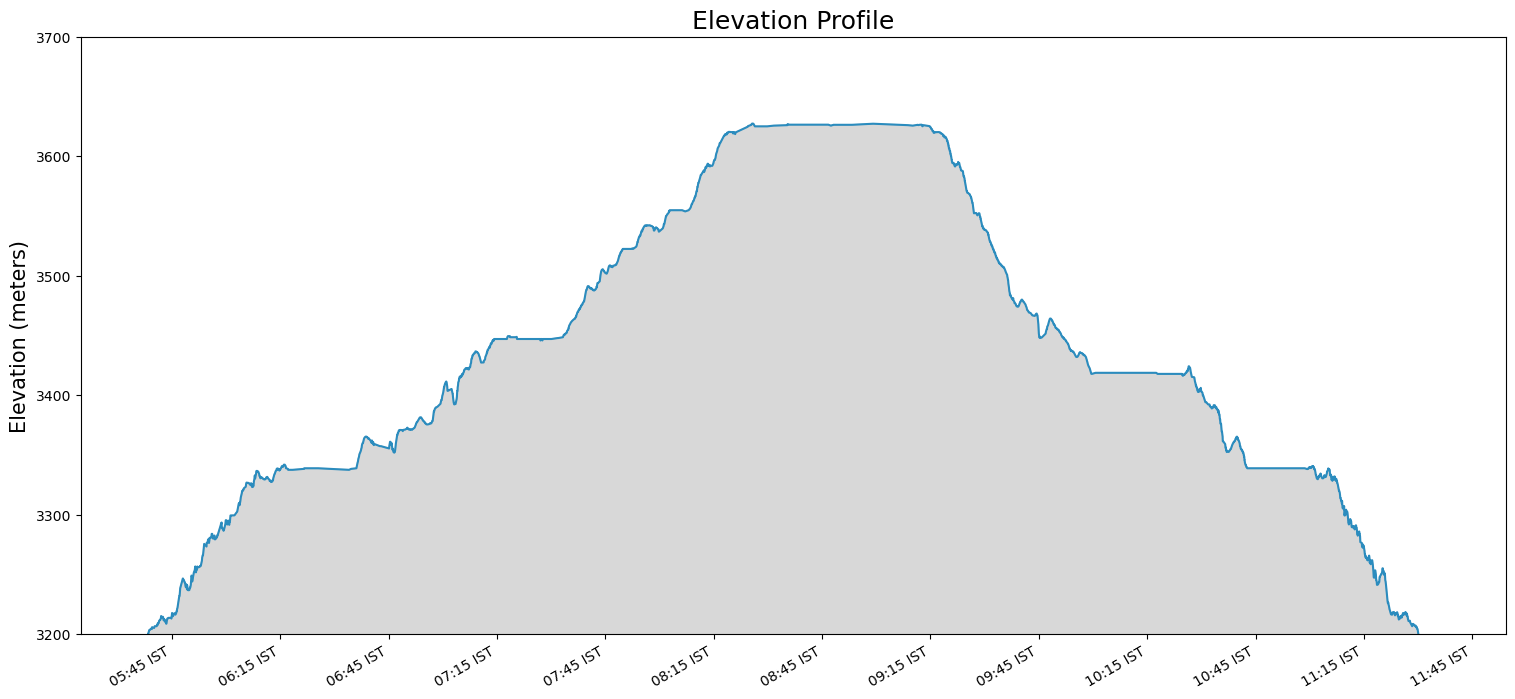

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
gdf['ele'].plot(kind='line', ax=ax, color='#2b8cbe')
plt.tight_layout()
plt.title('Elevation Profile', fontsize = 18)
plt.ylabel('Elevation (meters)', size = 15)
plt.xlabel(None)
# Show a tick every 30 minute
xlocator = mdates.MinuteLocator(interval=30)

xformat = mdates.DateFormatter('%H:%M %Z', tz=gdf.index.tz)  # adds some extra formatting, but not required

ax.xaxis.set_major_locator(xlocator)
ax.xaxis.set_major_formatter(xformat)
ax.set_ylim([3200, 3700])
ax.fill_between(gdf.index, gdf['ele'].values, color='grey', alpha=0.3)
plt.show()

In [ ]:
plt.style.use('default')